以鸢尾花数据集为例学习 SVM

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
 

numpy 和 pandas：这两个库主要用于数据处理和操作，numpy用于数值计算，pandas用于处理数据框架（DataFrame）。
datasets：从sklearn中导入datasets模块，用于加载常见的数据集（比如鸢尾花数据集）。
train_test_split：用于将数据集分为训练集和测试集。
GridSearchCV：用于执行超参数调优，搜索最佳的模型参数组合。
SVC：支持向量机（SVM）分类器。
accuracy_score, recall_score, f1_score, confusion_matrix, classification_report：这些是用于评估模型性能的函数。

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
#调整SVM模型参数并进行网格搜索
param_grid = {'C': [0.1, 1, 10, 100]}  # 只调整C参数，线性核没有gamma参数
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=1)

param_grid：定义了需要调节的SVM超参数C的候选值
C：SVM中的惩罚参数，控制模型对误分类的容忍度，较大的C值意味着更严格的拟合。
GridSearchCV：执行网格搜索来寻找最佳的C和gamma组合。cv=5表示使用5折交叉验证，verbose=1用于显示搜索的进度，n_jobs=-1表示使用所有可用的CPU核心来加速计算。

In [8]:
best_svm_model = grid_search.best_estimator_


In [9]:
#用最佳模型进行预测
y_pred = best_svm_model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


accuracy_score(y_test, y_pred)：计算模型的准确率，即正确预测的样本占总样本的比例。
recall_score(y_test, y_pred, average='weighted')：计算加权平均的召回率，average='weighted'表示按各类样本数目加权计算。
f1_score(y_test, y_pred, average='weighted')：计算加权平均的F1得分，综合考虑精度和召回率。
confusion_matrix(y_test, y_pred)：计算混淆矩阵，显示每个类别的真实标签和预测标签之间的关系。
classification_report(y_test, y_pred)：生成分类报告，展示每个类别的精度、召回率、F1得分等指标。

In [11]:
print("Best SVM Model Parameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)
print("Recall (Weighted): ", recall)
print("F1 Score (Weighted): ", f1)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report:\n", class_report)


Best SVM Model Parameters:  {'C': 1}
Accuracy:  1.0
Recall (Weighted):  1.0
F1 Score (Weighted):  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



以新闻数据分类为例 学习朴素贝叶斯

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


sklearn.feature_extraction.text.CountVectorizer: 用于将文本数据转换为词袋模型（bag-of-words）。
sklearn.naive_bayes.MultinomialNB: 用于训练朴素贝叶斯分类器。

In [2]:
newsgroups = fetch_20newsgroups(subset='all')


In [3]:
print("类别标签：", newsgroups.target_names)
print("数据集描述：", newsgroups.DESCR)
print("数据样本：", newsgroups.data[:5])


类别标签： ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述： .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

In [4]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)


In [6]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [7]:
y_pred = nb_classifier.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 采用宏平均
f1 = f1_score(y_test, y_pred, average='macro')  # 采用宏平均
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8743
Recall: 0.8704
F1 Score: 0.8669


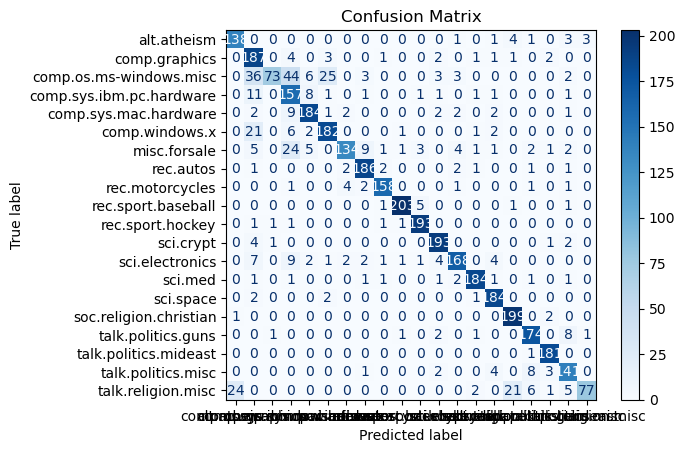

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

以鸢尾花数据集为例 学习k-means聚类

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 实际标签



先聚类再降维

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


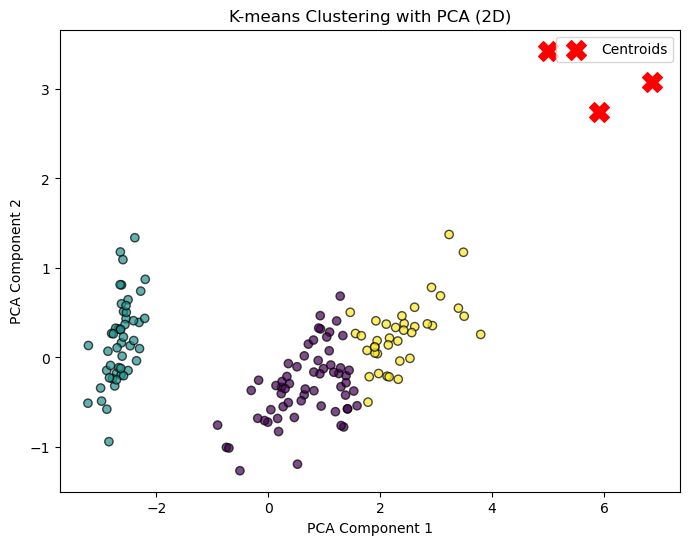

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化降维后的数据与聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering with PCA (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


先降维再聚类

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


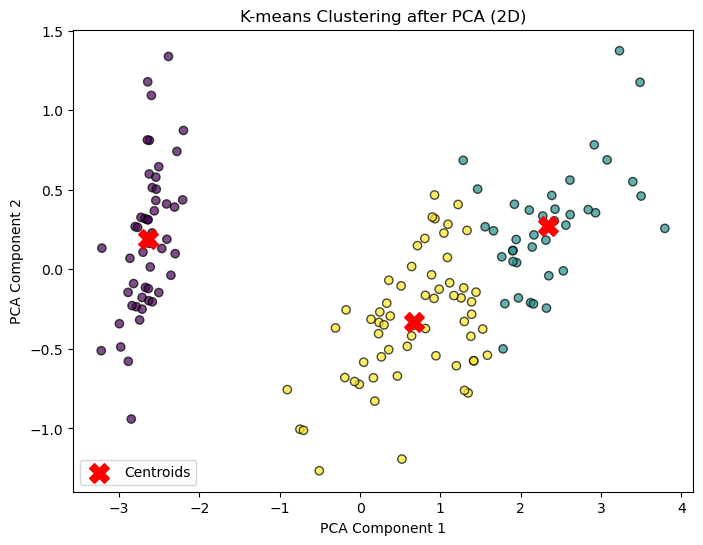

In [14]:
X_pca = PCA(n_components=2).fit_transform(X)  # 降维到2维
kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# 可视化PCA降维后的聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering after PCA (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [15]:
sil_score = silhouette_score(X, y_kmeans)
print(f"聚类后的轮廓系数：{sil_score}")


聚类后的轮廓系数：0.5528190123564095


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


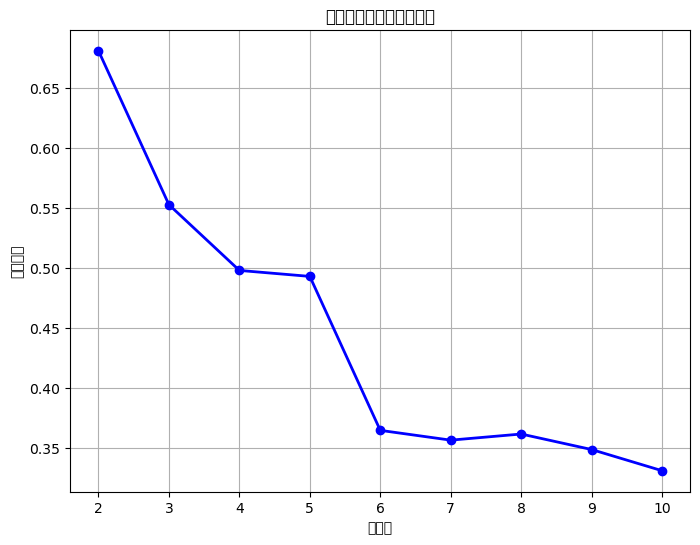

In [16]:
sil_scores = []
cluster_range = range(2, 11)  # 聚类数从2到10
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, y_kmeans)
    sil_scores.append(sil_score)

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, sil_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title("轮廓系数与聚类数的关系")
plt.xlabel("聚类数")
plt.ylabel("轮廓系数")
plt.grid(True)
plt.show()
